# Plot weighted degree distribution

In this notebook, we are fetching node's weighted degree from Neo4j and storing data in a `pandas.DataFrame`. From there, we are drawing the degree-distribution plots.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from neo4j import GraphDatabase

## load custom matplotlib style for nicer (IMHO) figure rendering
# comment out if you have not downloaded the file
plt.style.use('../../../my_style.mplstyle')

In [3]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "<PASSWORD>"))

In [4]:
def plot_degree_distribution(degrees: pd.Series):
    # define figure and subplots
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.subplots(1, 1)

    # compute and draw degree distribution
    distribution = degrees.value_counts().sort_index()
    distribution.plot(
        ax=ax1, 
        marker="o", color="k",
        title="Degree Distribution", xlabel="Degree", ylabel="nbOccurrences",
        logy=True, 
        logx=True,
    )

    fig.tight_layout()
    return fig

In [5]:
def get_weighted_degrees(tx, node_label: str, rel_type: str) -> dict[int, int]:
    query = f"""
    MATCH (n:{node_label})-[r:{rel_type}]-() 
    RETURN elementId(n) as id, sum(r.weight) as degree
    """
    result = tx.run(query)
    res = result.data()
    return res

In [6]:
with driver.session() as s:
    degree_data = s.read_transaction(get_weighted_degrees, "Person", "KNOWS")
    
data = pd.DataFrame(degree_data)

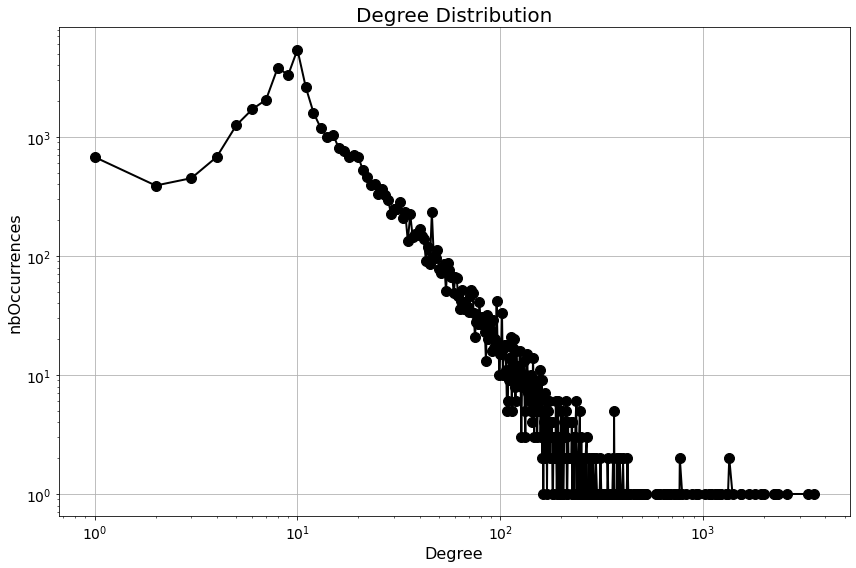

In [7]:
plot_degree_distribution(data.degree);